In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay, cKDTree
from matplotlib.lines import Line2D
import ForwardPassUtils as fpu

#132,7
np.random.seed(2)
nb_sites = 5
points = np.random.rand(nb_sites, 2)  # 10 sites initiaux
ind = np.lexsort((points[:, 1], points[:, 0]))
points = points[ind]

point_names = [f"s{i}" for i in range(nb_sites)]

voronoi_initial = Voronoi(points)

minX, maxX, minY, maxY = fpu.computeMinMax(voronoi_initial)

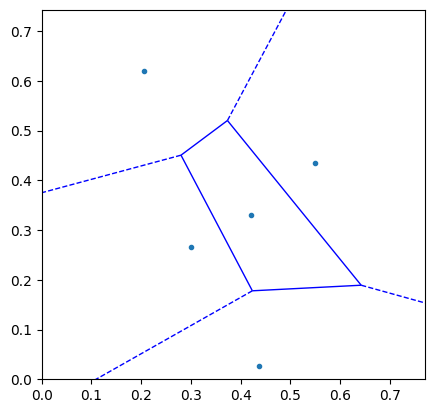

In [2]:
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=False, line_colors='blue')
plt.xlim(minX, maxX)
plt.ylim(minY, maxY)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('images/v1.png')
plt.show()

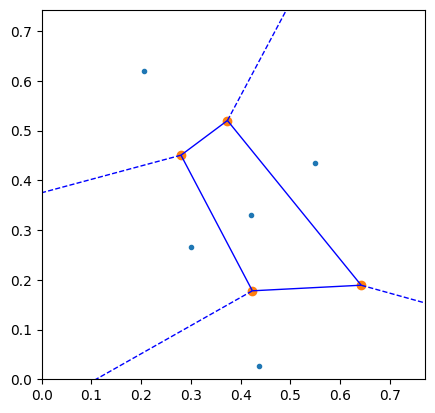

[[0.64230474 0.18912275]
 [0.42350687 0.17789056]
 [0.37341047 0.5202724 ]
 [0.28004969 0.45056942]]


In [3]:
voronoi_initial = Voronoi(points)
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')
plt.xlim(minX, maxX)
plt.ylim(minY, maxY)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('images/v2.png')
plt.show()
print(voronoi_initial.vertices)

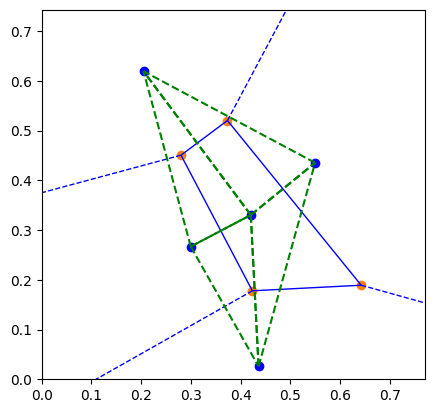

In [4]:

# Compute the Voronoi diagram
voronoi_initial = Voronoi(points)

# Compute the Delaunay triangulation
delaunay = Delaunay(points)

# Plot the Voronoi diagram
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')

# Plot the points
ax.plot(points[:, 0], points[:, 1], 'bo')

for simplex in delaunay.simplices:
    for i in range(len(simplex)):
        for j in range(i + 1, len(simplex)):
            p1 = points[simplex[i]]
            p2 = points[simplex[j]]
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'g--')

plt.xlim(minX, maxX)
plt.ylim(minY, maxY)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('images/v3.png')
plt.show()


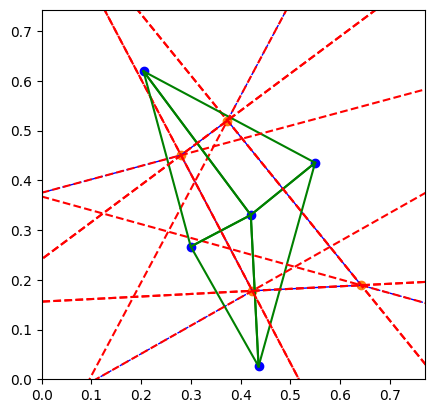

In [5]:
# Compute the Voronoi diagram
voronoi_initial = Voronoi(points)

# Compute the Delaunay triangulation
delaunay = Delaunay(points)

# Plot the Voronoi diagram
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')

# Plot the points
ax.plot(points[:, 0], points[:, 1], 'bo')

# Trace lines between the sites (Delaunay edges) and plot perpendicular bisectors
for simplex in delaunay.simplices:
    for i in range(len(simplex)):
        for j in range(i + 1, len(simplex)):
            p1 = points[simplex[i]]
            p2 = points[simplex[j]]
            # Plot the green line connecting the sites
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'g-')
            # Plot the perpendicular bisector
            fpu.plot_perpendicular_bisector(p1, p2, ax)

plt.xlim(minX, maxX)
plt.ylim(minY, maxY)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('images/v4.png')
plt.show()


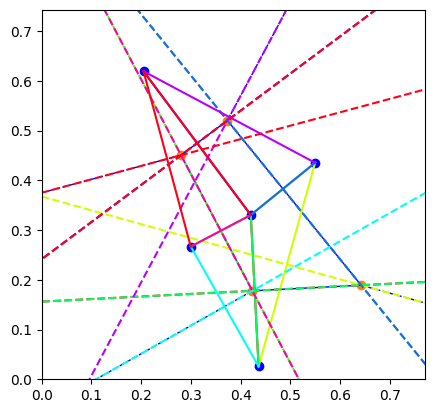

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay

# Compute the Voronoi diagram
voronoi_initial = Voronoi(points)

# Compute the Delaunay triangulation
delaunay = Delaunay(points)

# Plot the Voronoi diagram
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')

# Plot the points
ax.plot(points[:, 0], points[:, 1], 'bo')

# Use the HSV colormap to generate colors
cmap = plt.colormaps['hsv']

# Trace lines between the sites (Delaunay edges) and plot perpendicular bisectors
color_index = 0
for simplex in delaunay.simplices:
    for i in range(len(simplex)):
        for j in range(i + 1, len(simplex)):
            p1 = points[simplex[i]]
            p2 = points[simplex[j]]
            # Get a color from the colormap
            color = cmap(color_index)  # Normalized index
            color_index += .1
            # Plot the line connecting the sites
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], linestyle='-', color=color)
            # Plot the perpendicular bisector
            fpu.plot_perpendicular_bisector(p1, p2, ax, color=color)

plt.xlim(minX, maxX)
plt.ylim(minY, maxY)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('images/v5.png')
plt.show()


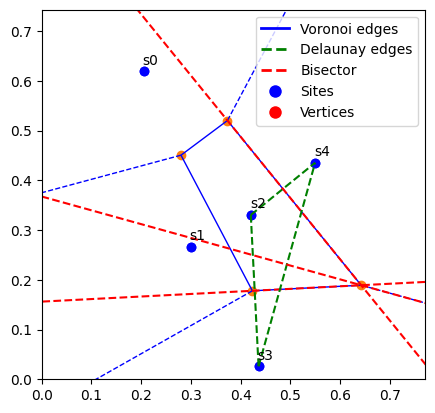

In [7]:
# Compute the Voronoi diagram
voronoi_initial = Voronoi(points)

# Compute the Delaunay triangulation
delaunay = Delaunay(points)

# Plot the Voronoi diagram
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')

# Plot the points
ax.plot(points[:, 0], points[:, 1], 'bo')

# Plot the points with labels
for i, (point, name) in enumerate(zip(points, point_names)):
    ax.plot(point[0], point[1], 'bo', label=f'Point {name}')
    ax.annotate(name, (point[0], point[1]), textcoords="offset points", xytext=(5, 5), ha='center')

# Trace lines between the sites (Delaunay edges) and plot perpendicular bisectors
for simplex in delaunay.simplices:
    for i in range(len(simplex)):
        for j in range(i + 1, len(simplex)):
            p1 = points[simplex[i]]
            p2 = points[simplex[j]]
            # Plot the green line connecting the sites
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'g--')
            # Plot the perpendicular bisector
            fpu.plot_perpendicular_bisector(p1, p2, ax)
    break

# Manually create legend handles
legend_elements = [Line2D([0], [0], color='blue', lw=2, label='Voronoi edges'),
                   Line2D([0], [0], linestyle='--', color='g', lw=2, label='Delaunay edges'),
                   Line2D([0], [0], linestyle='--', color='r', lw=2, label='Bisector'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='Sites'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Vertices')]

# Add the legend
ax.legend(handles=legend_elements, loc='upper right')

plt.xlim(minX, maxX)
plt.ylim(minY, maxY)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('images/v6.png')
plt.show()



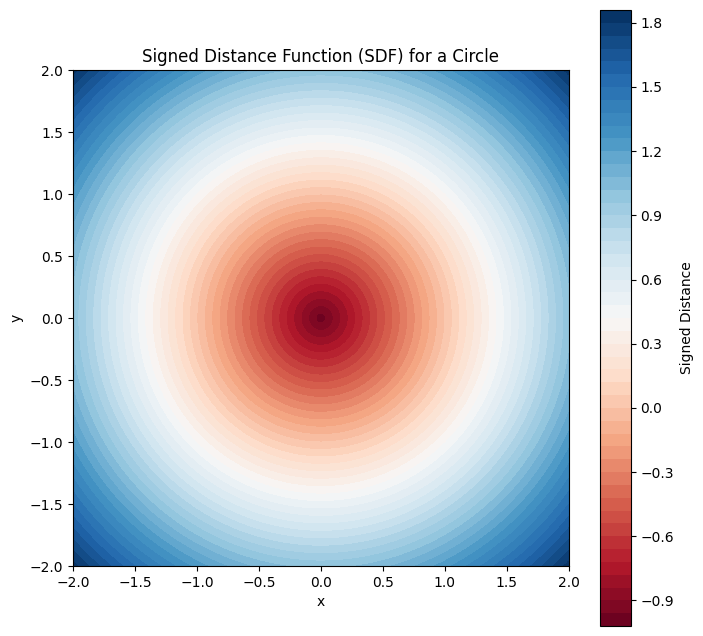

In [8]:
# Create a grid of points
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

# Compute the SDF values for each point in the grid
Z = fpu.sdf_circle(X, Y, radius=1)

# Plot the SDF
plt.figure(figsize=(8, 8))
contour = plt.contourf(X, Y, Z, levels=50, cmap='RdBu')
plt.colorbar(contour, label='Signed Distance')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Signed Distance Function (SDF) for a Circle')
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('images/sdf1.png')
plt.show()


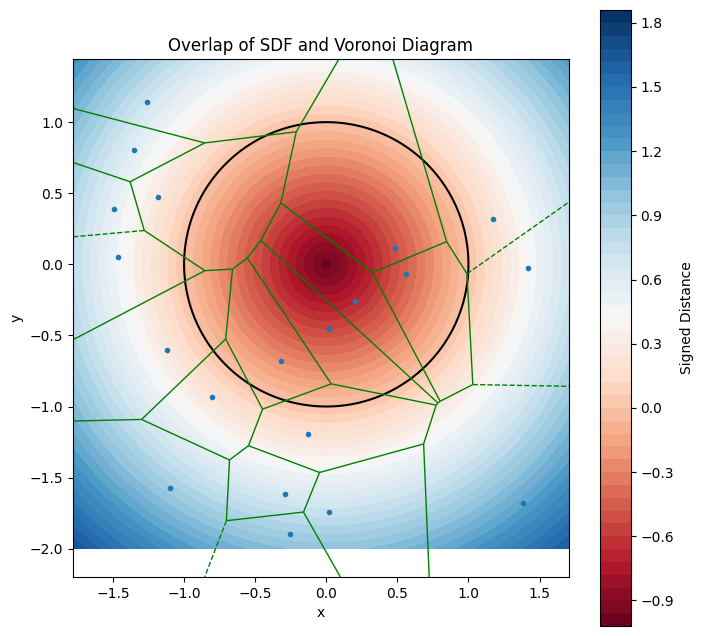

In [9]:
# Generate random points for Voronoi diagram
np.random.seed(2)  # For reproducibility
points = np.random.rand(20, 2) * 4 - 2  # 15 points in the range [-2, 2]

# Compute the Voronoi diagram
voronoi_initial = Voronoi(points)

# Plot the SDF
fig, ax = plt.subplots(figsize=(8, 8))
contour = ax.contourf(X, Y, Z, levels=50, cmap='RdBu')
fig.colorbar(contour, ax=ax, label='Signed Distance')

# Plot the zero level set (the circle boundary)
ax.contour(X, Y, Z, levels=[0], colors='black')

# Plot the Voronoi diagram
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=False, line_colors='green')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')

plt.title('Overlap of SDF and Voronoi Diagram')
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('images/sdf2.png')
plt.show()

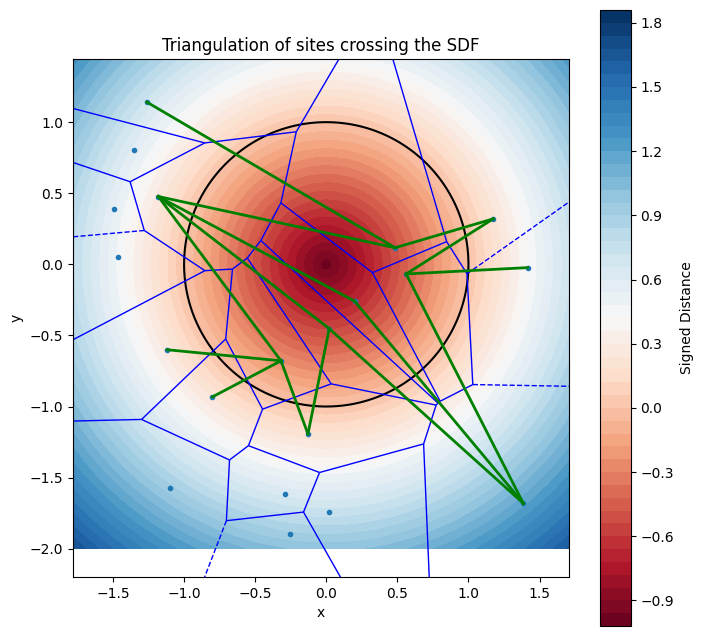

In [10]:

# Compute the Voronoi diagram
voronoi_initial = Voronoi(points)

# Check for SDF sign changes
sites_with_sign_change = fpu.check_voronoi_sign_change(voronoi_initial, fpu.sdf_circle)

# Create a grid of points for SDF visualization
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = fpu.sdf_circle(X, Y, radius=1)

# Plot the SDF
fig, ax = plt.subplots(figsize=(8, 8))
contour = ax.contourf(X, Y, Z, levels=50, cmap='RdBu')
fig.colorbar(contour, ax=ax, label='Signed Distance')

# Plot the zero level set (the circle boundary)
ax.contour(X, Y, Z, levels=[0], colors='black')

# Plot the Voronoi diagram
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=False, line_colors='blue')

# Plot the triangulation where SDF sign changes for the sites
for sites in sites_with_sign_change:
    p1, p2 = sites
    ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'g-', linewidth=2)

# Add labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Triangulation of sites crossing the SDF')
ax.set_aspect('equal', adjustable='box')
plt.savefig('images/sdf3.png')
plt.show()


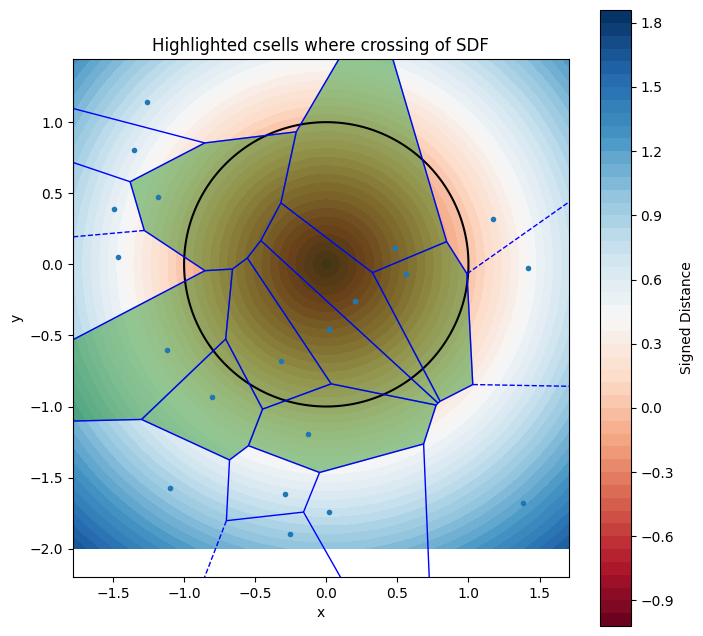

In [11]:

def check_voronoi_sign_change(voronoi, sdf_func, radius=1):
    # Initialize a set to store indices of sites where SDF sign changes
    sign_change_sites = set()

    # Iterate over the ridges in the Voronoi diagram
    for ridge_points in voronoi.ridge_points:
        p1 = voronoi.points[ridge_points[0]]
        p2 = voronoi.points[ridge_points[1]]

        sdf1 = sdf_func(p1[0], p1[1], radius)
        sdf2 = sdf_func(p2[0], p2[1], radius)

        # Check if the SDF signs are different
        if np.sign(sdf1) != np.sign(sdf2):
            sign_change_sites.add(ridge_points[0])
            sign_change_sites.add(ridge_points[1])

    return list(sign_change_sites)


# Compute the Voronoi diagram
voronoi_initial = Voronoi(points)

# Check for SDF sign changes
cells_with_sign_change = check_voronoi_sign_change(voronoi_initial, fpu.sdf_circle)

# Create a grid of points for SDF visualization
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = fpu.sdf_circle(X, Y, radius=1)

# Plot the SDF
fig, ax = plt.subplots(figsize=(8, 8))
contour = ax.contourf(X, Y, Z, levels=50, cmap='RdBu')
fig.colorbar(contour, ax=ax, label='Signed Distance')

# Plot the zero level set (the circle boundary)
ax.contour(X, Y, Z, levels=[0], colors='black')

# Plot the Voronoi diagram
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=False, line_colors='blue')

# Highlight the cells where SDF sign changes
for region_index in cells_with_sign_change:
    region = voronoi_initial.regions[voronoi_initial.point_region[region_index]]
    if -1 not in region:  # Ignore regions with infinity
        polygon = [voronoi_initial.vertices[i] for i in region]
        ax.fill(*zip(*polygon), color='green', alpha=0.4)

# Add labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Highlighted csells where crossing of SDF')
ax.set_aspect('equal', adjustable='box')
plt.savefig('images/sdf4.png')
plt.show()


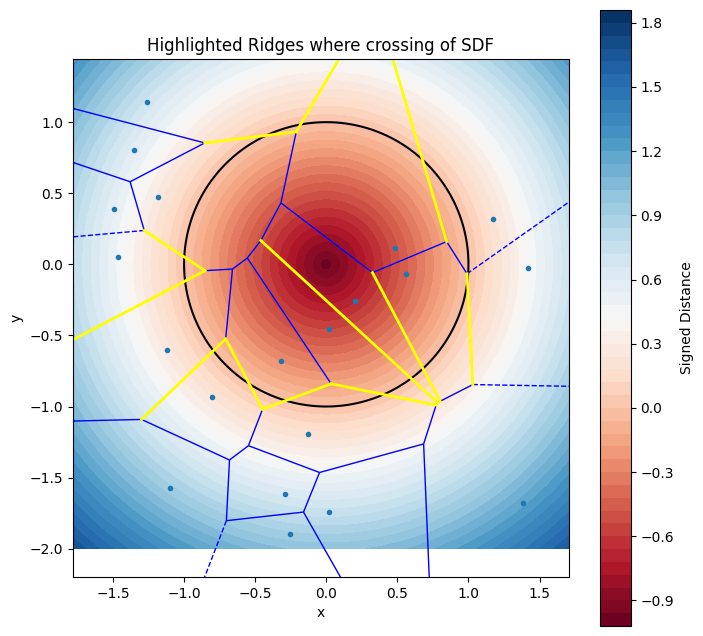

In [12]:


def sdf_circle(x, y, radius=1):
    return np.sqrt(x ** 2 + y ** 2) - radius


def check_voronoi_sign_change(voronoi, sdf_func, radius=1):
    # Initialize a list to store edges (ridges) where SDF sign changes
    sign_change_ridges = []

    # Iterate over the ridges in the Voronoi diagram
    for (p1_idx, p2_idx), (v1_idx, v2_idx) in zip(voronoi.ridge_points, voronoi.ridge_vertices):
        if v1_idx == -1 or v2_idx == -1:
            continue  # Skip infinite ridges

        # Evaluate SDF values at the vertices of the ridge
        v1 = voronoi.vertices[v1_idx]
        v2 = voronoi.vertices[v2_idx]
        sdf1 = sdf_func(v1[0], v1[1], radius)
        sdf2 = sdf_func(v2[0], v2[1], radius)

        # Check if the SDF signs are different
        if np.sign(sdf1) != np.sign(sdf2):
            sign_change_ridges.append((v1_idx, v2_idx))

    return sign_change_ridges


# Compute the Voronoi diagram
voronoi_initial = Voronoi(points)

# Check for SDF sign changes
ridges_with_sign_change = check_voronoi_sign_change(voronoi_initial, sdf_circle)

# Create a grid of points for SDF visualization
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = sdf_circle(X, Y, radius=1)

# Plot the SDF
fig, ax = plt.subplots(figsize=(8, 8))
contour = ax.contourf(X, Y, Z, levels=50, cmap='RdBu')
fig.colorbar(contour, ax=ax, label='Signed Distance')

# Plot the zero level set (the circle boundary)
ax.contour(X, Y, Z, levels=[0], colors='black')

# Plot the Voronoi diagram
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=False, line_colors='blue')

# Highlight the ridges where SDF sign changes
for v1_idx, v2_idx in ridges_with_sign_change:
    v1 = voronoi_initial.vertices[v1_idx]
    v2 = voronoi_initial.vertices[v2_idx]
    ax.plot([v1[0], v2[0]], [v1[1], v2[1]], 'yellow', linewidth=2)

# Add labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Highlighted Ridges where crossing of SDF')
ax.set_aspect('equal', adjustable='box')
plt.savefig('images/sdf6.png')
plt.show()


In [13]:
#return vertices from sites without computing the voronoi diagram. 

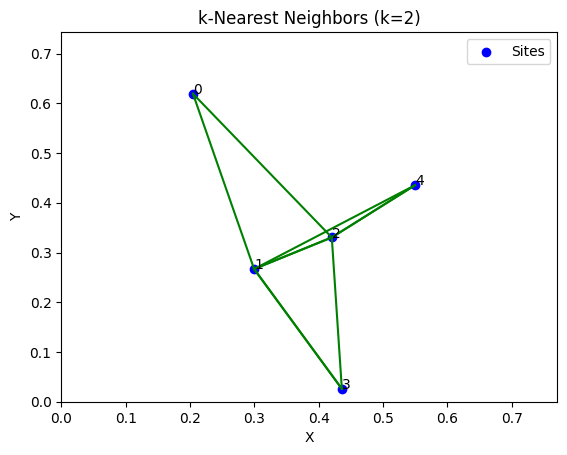

In [27]:
np.random.seed(2)
nb_sites = 5
points = np.random.rand(nb_sites, 2)  # 10 sites initiaux
ind = np.lexsort((points[:, 1], points[:, 0]))
points = points[ind]

point_names = [f"s{i}" for i in range(nb_sites)]

voronoi_initial = Voronoi(points)

minX, maxX, minY, maxY = fpu.computeMinMax(voronoi_initial)

k = 2
# Get the k nearest neighbors for each point
neighbors = fpu.k_nearest_neighbors(points, k)

# Plot the points
plt.scatter(points[:, 0], points[:, 1], color='blue', label='Sites')

# Plot the lines connecting each point to its k nearest neighbors
for i, neighbor_indices in enumerate(neighbors):
    for neighbor_index in neighbor_indices:
        plt.plot([points[i, 0], points[neighbor_index, 0]], [points[i, 1], points[neighbor_index, 1]], 'g-')

# Annotate the points
for i, point in enumerate(points):
    plt.annotate(f'{i}', (point[0], point[1]))

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(minX, maxX)
plt.ylim(minY, maxY)
plt.title(f'k-Nearest Neighbors (k={k})')
ax.set_aspect('equal', adjustable='box')
plt.savefig('images/knn1.png')

plt.show()

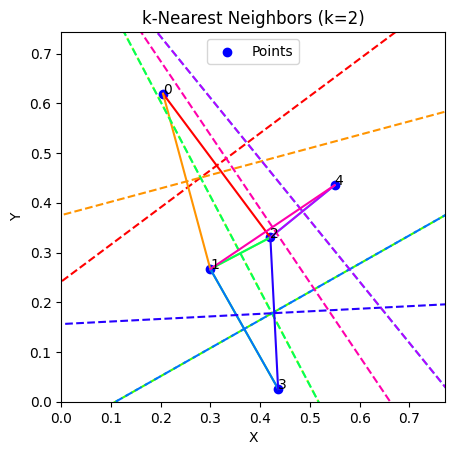

In [26]:
import numpy as np
import matplotlib.pyplot as plt


# Plot the Voronoi diagram
fig, ax = plt.subplots()

k = 2

# Get the k nearest neighbors for each point
neighbors = fpu.k_nearest_neighbors(points, k)

# Plot the points
ax.scatter(points[:, 0], points[:, 1], color='blue', label='Points')
cmap = plt.colormaps['hsv']
color_index = 0

# Plot the lines connecting each point to its k nearest neighbors and their bisectors
for i, neighbor_indices in enumerate(neighbors):
    for neighbor_index in neighbor_indices:
        color = cmap(color_index)  # Normalized index
        color_index += .1
        # Draw the green line connecting the points
        plt.plot([points[i, 0], points[neighbor_index, 0]], [points[i, 1], points[neighbor_index, 1]], linestyle='-' ,color=color)
        fpu.plot_perpendicular_bisector(points[i], points[neighbor_index], ax, color=color)

# Annotate the points
for i, point in enumerate(points):
    plt.annotate(f'{i}', (point[0], point[1]))

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(minX, maxX)
plt.ylim(minY, maxY)
plt.title(f'k-Nearest Neighbors (k={k})')
ax.set_aspect('equal', adjustable='box')
plt.savefig('images/knn2.png')

plt.show()
